<a href="https://colab.research.google.com/github/JoyceTsaiTsai/Python/blob/main/Python_Side_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Side Project 2
#A公司業務銷售之分析報告
-
#A公司今年2016年業績大幅下滑，包括：『不同業務單位，不同業務員，不同產品，逐年，每季，每月』的分析，找出業績下降的原因，以及如何改善。
-
#使用技術：分群技術(groupby），樞紐分析表，交叉分析圖（groupby..agg..unstack)，視覺化(matplotlib)。三種百分比表格來定量分析各種數據的物理意義。groupby..apply做樞紐分析表格的視覺化標註。分群+排序做強弱項分析。

# 分析1：讀入業務銷售的資料檔案csv
檔案：https://acupun.site/lecture/pandas/example/resource/sales.csv


In [ ]:
import pandas as pd
df=pd.read_csv('https://acupun.site/lecture/pandas/example/resource/sales.csv')
df

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額
0,2013-01-03,業務3,Mary,男,手機,1084,79291
1,2013-01-06,業務3,Allen,男,手機,620,107992
2,2013-01-08,業務3,Sam,男,手機,2201,91219
3,2013-01-08,業務3,Mary,男,平板,1301,86219
4,2013-01-09,業務2,Peter,男,手機,1331,79836
...,...,...,...,...,...,...,...
891,2016-10-23,業務1,Jorden,男,手機,937,207198
892,2016-10-23,業務4,Chris,男,電腦,2309,85962
893,2016-10-25,業務4,Coby,女,手機,1389,122263
894,2016-10-26,業務4,Robin,男,手機,545,81999


# 分析2：統計本年度，每個業務單位的銷售次數

In [ ]:
df.groupby('業務單位')['業務員'].size().rename(index='銷售次數',inplace=True).to_frame()

,銷售次數
業務單位,
業務1,228
業務2,228
業務3,232
業務4,208


# 分析3：統計本年度，每個業務單位的銷售總金額

In [ ]:
df.groupby('業務單位')['銷售金額'].sum().rename(index='年度銷售金額',inplace=True).to_frame()

,年度銷售金額
業務單位,
業務1,41849234
業務2,18533423
業務3,17242096
業務4,18242087


# 分析4：統計本年度，每個業務單位的『銷售總量，銷售總金額』

In [ ]:
df1=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})
df1.columns=['銷售總量','銷售總金額']
df1

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析5：熒光筆標示：『銷售總量最高值，銷售總金額最高值』

In [ ]:
df2=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_max(color="yellow")
df2

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析6：熒光筆標示：『銷售總量最低值，銷售總金額最低值』

In [ ]:
df2=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_min(color="pink")
df2

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析7：熒光筆標示：銷售總金額最高的是哪一個？（黃色）

In [ ]:
df2=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_max(subset='銷售總金額',color="yellow")
df2

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析8：熒光筆標示：銷售總金額欄位（黃色）

In [ ]:
df2=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.highlight_between(subset='銷售總金額',color="yellow")
df2

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 分析9：漸層圖標示：銷售總量欄位（Reds）

In [ ]:
df2=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})\
  .rename(columns={"銷售數量":"銷售總量","銷售金額":"銷售總金額"})\
  .style.background_gradient(cmap='Reds',subset='銷售總量')
df2

,銷售總量,銷售總金額
業務單位,,
業務1,2901936,41849234
業務2,3063210,18533423
業務3,2979484,17242096
業務4,2935313,18242087


# 安裝網頁中文字型

In [ ]:
#--------------------------------------
# colab繪圖顯示繁體中文
#--------------------------------------
import matplotlib
#colab顯示繁體中文 問題：matplotlib繪圖，會發生中文無法顯示的問題
# 先下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download import matplotlib
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

/bin/bash: import: command not found
--2023-06-21 06:04:29--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.79.101, 173.194.79.102, 173.194.79.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ae5e7qochir31hdplrdocdbhj0oq0i70/1687327425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=790919bf-3683-4974-a181-67465cc001f0 [following]
--2023-06-21 06:04:33--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ae5e7qochir31hdplrdocdbhj0oq0i70/1687327425000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=790919bf-3683-4974-a181-67465cc001f0
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.251.18.132, 2a00:1

# 分析10：畫圖『業務單位 vs 銷售總金額』

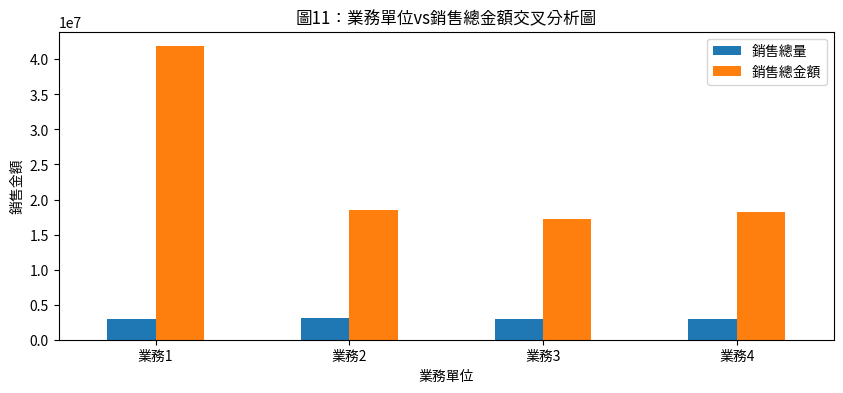

In [ ]:
import matplotlib.pyplot as plt
df1=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})
df1.columns=['銷售總量','銷售總金額']
df1.plot(kind="bar",figsize=(10,4),legend=True,rot=0,title='圖11：業務單位vs銷售總金額交叉分析圖')
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析11：畫圖『業務單位 vs 銷售總金額』，加上左右y軸，對應圖例

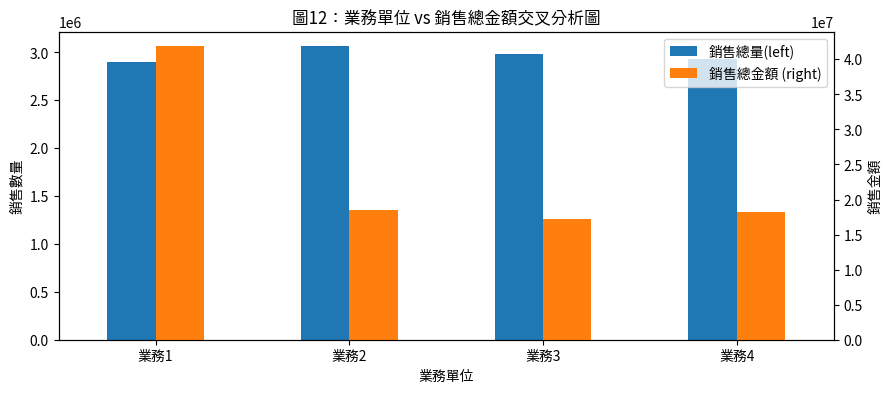

In [ ]:
ax1=df.groupby("業務單位").agg({"銷售數量":"sum","銷售金額":"sum"})\
  .rename(columns={'銷售數量':'銷售總量(left)', '銷售金額':'銷售總金額'})\
  .plot(kind="bar", legend=True, rot=0,secondary_y="銷售總金額",figsize=(10,4),title="圖12：業務單位 vs 銷售總金額交叉分析圖")

ax1.set_xlabel("業務單位")
ax1.set_ylabel('銷售數量')
ax1.right_ax.set_ylabel('銷售金額')
plt.show()

# 分析12：畫圖『業務單位 vs 銷售總金額』，分成上下圖

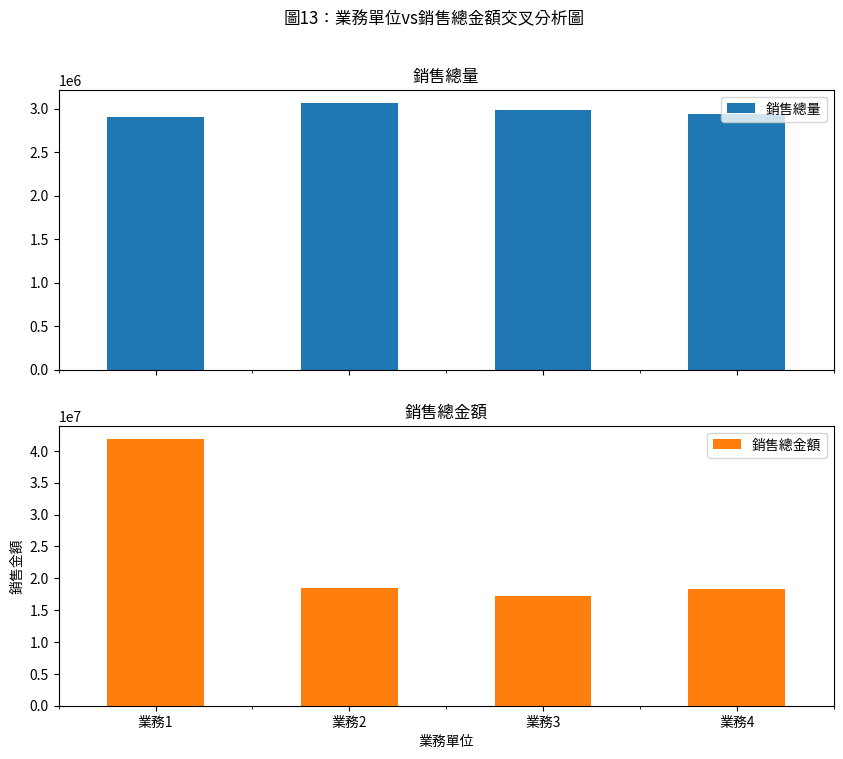

In [ ]:
import matplotlib.pyplot as plt
df1=df.groupby('業務單位').agg({'銷售數量':'sum','銷售金額':'sum'})
df1.columns=['銷售總量','銷售總金額']
df1.plot(kind="bar",subplots=True,figsize=(10,8),legend=True,rot=0,title='圖13：業務單位vs銷售總金額交叉分析圖')
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析13：顯示每一位業務員的年度銷售總金額，排序，高到低

In [ ]:
df.groupby('業務員').agg({'銷售金額':'sum'})\
  .sort_values('銷售金額',ascending=False)

,銷售金額
業務員,
Terry,14141090
Thomas,9817364
Jorden,9412480
John,8478300
Steve,5560626
Eric,5552115
Simon,5363826
Allen,5356577
Roger,5058574


# 分析14：請顯示，業務單位1，業務單位3，的每位業務員的銷售總金額

In [ ]:
df3=df.groupby('業務單位').get_group('業務1')
df3=df3.groupby('業務員').agg({'銷售金額':'sum'})
df3

,銷售金額
業務員,
John,8478300
Jorden,9412480
Terry,14141090
Thomas,9817364


# 分析15：排序：根據每個業務單位的字母順序(低到高)，顯示不同單位，不同業務員的銷售金額

In [ ]:
df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})

銷售金額
業務單位 業務員             
業務1  John     8478300
     Jorden   9412480
     Terry   14141090
     Thomas   9817364
業務2  Alisa    3440513
     Eric     5552115
     Peter    4482221
     Roger    5058574
業務3  Allen    5356577
     Mary     2817989
     Sam      3506904
     Steve    5560626
業務4  Chris    4068670
     Coby     4947153
     Robin    3862438
     Simon    5363826

# 分析16：分群(業務單位,業務員)後，計算銷售金額，再排序（先依照業務單位排(低到高)，若同單位，再依銷售金額排(高到低)）

In [ ]:
df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,False])

銷售金額
業務單位 業務員             
業務1  Terry   14141090
     Thomas   9817364
     Jorden   9412480
     John     8478300
業務2  Eric     5552115
     Roger    5058574
     Peter    4482221
     Alisa    3440513
業務3  Steve    5560626
     Allen    5356577
     Sam      3506904
     Mary     2817989
業務4  Simon    5363826
     Coby     4947153
     Chris    4068670
     Robin    3862438

# 分析17：分群(業務單位,業務員),再計算銷售金額後，顯示每個單位的銷售第一名是誰？
顯示表格標題，表格寬度200px，文字大小24px

In [ ]:
df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,False])\
  .groupby('業務單位')\
  .head(1)\
  .style.set_caption('表:顯示每個單位的銷售第一名')\
  .set_properties(**{'width': '200px', 'font-size': '24px'})

,,銷售金額
業務單位,業務員,
業務1,Terry,14141090
業務2,Eric,5552115
業務3,Steve,5560626
業務4,Simon,5363826


# 分析18：分群(業務單位,業務員),再計算銷售金額後，顯示各單位第一名，但不顯示業務員姓名

In [ ]:
df5=df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,False])\
  .groupby('業務單位')\
  .first()

df5
#.first()不會顯示業務員名字


,銷售金額
業務單位,
業務1,14141090
業務2,5552115
業務3,5560626
業務4,5363826


# 分析19：分群(業務單位,業務員),再計算銷售金額後，顯示各單位前3名（顯示業務員姓名）
顯示表格標題，表格寬度200px，文字大小16px

In [ ]:
df6=df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,False])\
  .groupby('業務單位')\
  .head(3)\
  .style.set_caption('表:顯示各單位前3名')\
  .set_properties(**{'width': '200px', 'font-size': '16px'})
df6

# 分析20：分群(業務單位,業務員),再計算銷售金額後，顯示每個單位的銷售最後一名是誰？
顯示表格標題，表格寬度200px，文字大小16px

In [ ]:
df7=df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,False])\
  .groupby('業務單位')\
  .tail(1)\
  .style.set_caption('表:顯示每個單位的銷售最後一名')\
  .set_properties(**{'width': '200px', 'font-size': '16px'})
df7

,,銷售金額
業務單位,業務員,
業務1,John,8478300
業務2,Alisa,3440513
業務3,Mary,2817989
業務4,Robin,3862438


# 分析21：分群(業務單位,業務員),再計算銷售金額後，顯示每個單位的銷售第一名的index

In [ ]:
df5=df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,False])\
  .groupby('業務單位')\
  .head(1)

def func(x):
  return x.name

df5['銷售金額'] = df5.apply(func, axis = 1)

df5 = df5.droplevel('業務員')# 使用droplevel()刪除業務員索引層級
df5

,銷售金額
業務單位,
業務1,"(業務1, Terry)"
業務2,"(業務2, Eric)"
業務3,"(業務3, Steve)"
業務4,"(業務4, Simon)"


# 分析22：分群(業務單位,業務員),再計算銷售金額後，熒光筆標註每個單位的銷售第一名

In [ ]:
df8=df.groupby(['業務單位','業務員']).agg({'銷售金額':'sum'})\
  .sort_values(['業務單位','銷售金額'],ascending=[True,True])

def myfun(x):
  print(list(x.groupby('業務單位').idxmax()))
  return ['background-color:yellow' if item in list(x.groupby('業務單位').idxmax()) else '' for item in x.index]
df8.style.apply(myfun,axis=0)


[('業務1', 'Terry'), ('業務2', 'Eric'), ('業務3', 'Steve'), ('業務4', 'Simon')]


# 分析23：熒光筆標示每個業務單位的最高銷售總金額(黃色)，最低值(粉紅色)

In [ ]:
df2 = df.groupby(["業務單位","業務員"]).agg({"銷售金額":"sum"})\
  .sort_values(["業務單位","銷售金額"], ascending=[True,True])
def myfun1(x):
  a1 = ["background-color:yellow" if i in list(x.groupby('業務單位').idxmax()) else "" for i in x.index]
  return a1
def myfun2(x):
  a2 = ["background-color:pink" if i in list(x.groupby('業務單位').idxmin()) else "" for i in x.index]
  return a2
df2.style.apply(myfun1,axis=0).apply(myfun2,axis=0)

# 分析24：分群(業務單位,業務員),再計算銷售金額後，建立交叉分析表（使用groupby..unstack)

In [ ]:
df.groupby(['業務單位','銷售產品']).agg({'銷售金額':'sum'})\
  .unstack(level='銷售產品')

銷售金額                            
銷售產品        平板        手機       鍵盤       電腦
業務單位                                      
業務1   11293148  13154647  7825479  9575960
業務2    4818464   5503935  3429055  4781969
業務3    3605371   5973702  3730727  3932296
業務4    4233983   8016938  2660749  3330417

# 分析25：分群(業務單位,業務員),再計算銷售金額後，建立交叉分析表（使用pivot_table)

In [ ]:
df8=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df8.columns.name=('產品銷售金額')
df8

產品銷售金額,平板,手機,鍵盤,電腦
業務單位,,,,
業務1,11293148,13154647,7825479,9575960
業務2,4818464,5503935,3429055,4781969
業務3,3605371,5973702,3730727,3932296
業務4,4233983,8016938,2660749,3330417


# 分析26：把交叉分析表，加上千分位
分群(業務單位,業務員),再計算銷售金額後，建立交叉分析表
#方法1：df = pd.read_csv("data.csv", thousands=",")

#方法2：style.format(thousands=',')
參考官網教學：
https://pandas.pydata.org/docs/dev/reference/api/pandas.io.formats.style.Styler.format.html


In [ ]:
df.groupby(['業務單位','銷售產品']).agg({'銷售金額':'sum'})\
  .unstack(level='銷售產品')\
  .style.format(thousands=',')

# 分析27：畫圖：分群(業務單位,業務員)，再計算銷售金額後，建立交叉分析圖

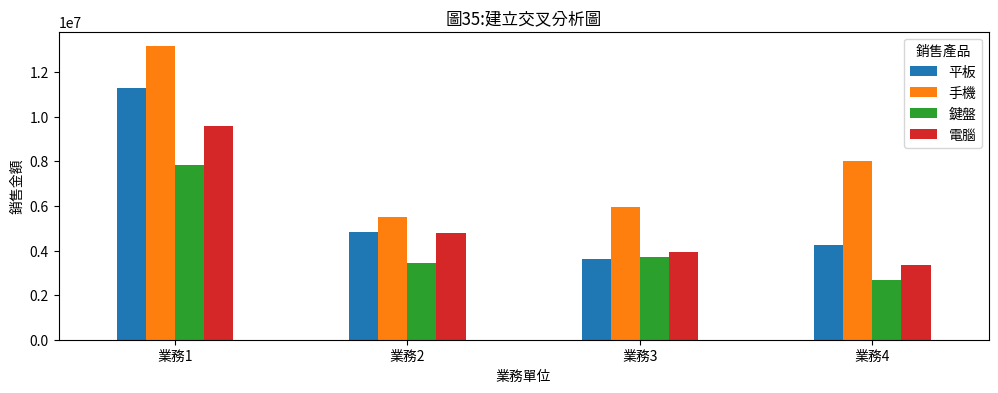

In [ ]:
import matplotlib.pyplot as plt
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9.plot(figsize=(12,4),kind="bar",legend=True,rot=0,title='圖35:建立交叉分析圖')
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析28：畫柱狀堆疊圖：分群(業務單位,業務員)，再計算銷售金額後，建立交叉分析圖(堆疊圖)

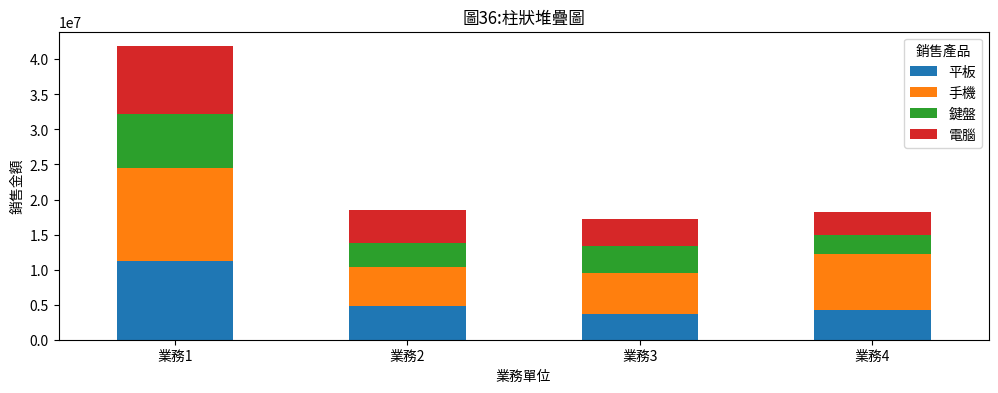

In [ ]:
import matplotlib.pyplot as plt
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9.plot(figsize=(12,4),stacked=True,kind="bar",legend=True,rot=0,title='圖36:柱狀堆疊圖')
plt.xlabel("業務單位")
plt.ylabel("銷售金額")
plt.show()

# 分析29：交叉分析『業務單位，銷售產品』的銷售金額，最後計算業務銷售總和

In [ ]:
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9['業務銷售總和']=df9.sum(axis=1)
df9.columns.name=''
df9.columns=['平板金額','手機金額','鍵盤金額','電腦金額','業務銷售總和']
df9

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,11293148,13154647,7825479,9575960,41849234
業務2,4818464,5503935,3429055,4781969,18533423
業務3,3605371,5973702,3730727,3932296,17242096
業務4,4233983,8016938,2660749,3330417,18242087


# 分析30：交叉分析『業務單位，銷售產品』的銷售金額，最後計算『業務銷售總和，產品銷售總和』

In [ ]:
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9['業務銷售總和']=df9.sum(axis=1)
df9.loc['產品銷售總和']=df9.sum(axis=0)
df9.columns.name=''
df9.columns=['平板金額','手機金額','鍵盤金額','電腦金額','業務銷售總和']
df9

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,11293148,13154647,7825479,9575960,41849234
業務2,4818464,5503935,3429055,4781969,18533423
業務3,3605371,5973702,3730727,3932296,17242096
業務4,4233983,8016938,2660749,3330417,18242087
產品銷售總和,23950966,32649222,17646010,21620642,95866840


# 分析31：使用pivot_table，快速建立交叉分析『業務單位，銷售產品』的銷售金額，並計算『業務銷售總和，產品銷售總和』

In [ ]:
df10=df.pivot_table(columns='銷售產品',index='業務單位',values='銷售金額',aggfunc='sum')
df10['總和']=df10.sum(axis=1)
df10.loc['總和']=df10.sum(axis=0)
df10

銷售產品,平板,手機,鍵盤,電腦,總和
業務單位,,,,,
業務1,11293148,13154647,7825479,9575960,41849234
業務2,4818464,5503935,3429055,4781969,18533423
業務3,3605371,5973702,3730727,3932296,17242096
業務4,4233983,8016938,2660749,3330417,18242087
總和,23950966,32649222,17646010,21620642,95866840


# 分析32：修改交叉分析表為『總計百分比表格』
（1）百分比表格，有三種：

**• 總計百分比：以總和當分母（右下角為100，右下角值=df.iloc[-1,-1]）**

• 欄的總和百分比：以欄的總和當分母。

• 列的總和百分比：以列的總和當分母。


In [ ]:
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9['業務銷售總和']=df9.sum(axis=1)
df9.loc['產品銷售總和']=df9.sum(axis=0)
df9.columns.name=''
df9.columns=['平板金額','手機金額','鍵盤金額','電腦金額','業務銷售總和']
(df9/df9.iloc[-1,-1]*100).round(2)

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,11.78,13.72,8.16,9.99,43.65
業務2,5.03,5.74,3.58,4.99,19.33
業務3,3.76,6.23,3.89,4.10,17.99
業務4,4.42,8.36,2.78,3.47,19.03
產品銷售總和,24.98,34.06,18.41,22.55,100.00


# 分析33：修改交叉分析表為『欄的總和百分比』
（1）百分比表格，有三種：

• 總計百分比：以總和當分母（右下角為100，右下角值=df.iloc[-1,-1]）

**• 欄的總和百分比：以欄的總和當分母。(欄位最下，都為100)**

• 列的總和百分比：以列的總和當分母

#（2）相除指令：df1.div(series, axis=0/1)

**axis=0：表示將除數series，以垂直方式去除（將series直放）**

**axis=1：表示將除數series，以水平方式去除（將series橫放）**


In [ ]:
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9['業務銷售總和']=df9.sum(axis=1)
df9.loc['產品銷售總和']=df9.sum(axis=0)
df9.columns.name=''
df9.columns=['平板金額','手機金額','鍵盤金額','電腦金額','業務銷售總和']
(df9.div(df9.loc["產品銷售總和"],axis=1)*100).round(2)

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,47.15,40.29,44.35,44.29,43.65
業務2,20.12,16.86,19.43,22.12,19.33
業務3,15.05,18.30,21.14,18.19,17.99
業務4,17.68,24.55,15.08,15.40,19.03
產品銷售總和,100.00,100.00,100.00,100.00,100.00


# 分析34：修改交叉分析表為『列的總和百分比』
（1）百分比表格，有三種：

• 總計百分比：以總和當分母（右下角為100，右下角值=df.iloc[-1,-1]）

• 欄的總和百分比：以欄的總和當分母。(欄位最下，都為100)

**• 列的總和百分比：以列的總和當分母。**

#（2）相除指令：df1.div(series, axis=0/1)

**axis=0：表示將除數series，以垂直方式去除（將series直放）**

**axis=1：表示將除數series，以水平方式去除（將series橫放）**

In [ ]:
df9=df.pivot_table(columns='銷售產品', index='業務單位', values='銷售金額', aggfunc='sum')
df9['業務銷售總和']=df9.sum(axis=1)
df9.loc['產品銷售總和']=df9.sum(axis=0)
df9.columns.name=''
df9.columns=['平板金額','手機金額','鍵盤金額','電腦金額','業務銷售總和']
(df9.div(df9["業務銷售總和"],axis=0)*100).round(2)

,平板金額,手機金額,鍵盤金額,電腦金額,業務銷售總和
業務單位,,,,,
業務1,26.99,31.43,18.70,22.88,100.0
業務2,26.00,29.70,18.50,25.80,100.0
業務3,20.91,34.65,21.64,22.81,100.0
業務4,23.21,43.95,14.59,18.26,100.0
產品銷售總和,24.98,34.06,18.41,22.55,100.0


# 分析35：分3群，交叉分析『業務單位，業務員，銷售產品』的銷售金額

In [ ]:
df.groupby(['業務單位','業務員','銷售產品']).agg({'銷售金額':'sum'})\
  .unstack(level='銷售產品')

銷售金額                           
銷售產品              平板       手機       鍵盤       電腦
業務單位 業務員                                       
業務1  John    3029386  2849597  1135060  1464257
     Jorden  3467950  2219334  1715503  2009693
     Terry   2045086  4570886  3338603  4186515
     Thomas  2750726  3514830  1636313  1915495
業務2  Alisa    977354   865267  1017345   580547
     Eric    1805237  1273493  1029744  1443641
     Peter    978705  1766964   487997  1248555
     Roger   1057168  1598211   893969  1509226
業務3  Allen    868284  1994505  1272038  1221750
     Mary     537782  1074600   581461   624146
     Sam      712216  1274465   582955   937268
     Steve   1487089  1630132  1294273  1149132
業務4  Chris   1058980  1655202   419124   935364
     Coby    1217955  2597607   546286   585305
     Robin    609592  1937809   688969   626068
     Simon   1347456  1826320  1006370  1183680

# 分析36：使用pivot_table在交叉分析表，分3群，交叉分析『業務單位，業務員，銷售產品』的銷售金額

In [ ]:
df.pivot_table(columns='銷售產品',index=['業務單位','業務員'],values='銷售金額',aggfunc='sum')

銷售產品              平板       手機       鍵盤       電腦
業務單位 業務員                                       
業務1  John    3029386  2849597  1135060  1464257
     Jorden  3467950  2219334  1715503  2009693
     Terry   2045086  4570886  3338603  4186515
     Thomas  2750726  3514830  1636313  1915495
業務2  Alisa    977354   865267  1017345   580547
     Eric    1805237  1273493  1029744  1443641
     Peter    978705  1766964   487997  1248555
     Roger   1057168  1598211   893969  1509226
業務3  Allen    868284  1994505  1272038  1221750
     Mary     537782  1074600   581461   624146
     Sam      712216  1274465   582955   937268
     Steve   1487089  1630132  1294273  1149132
業務4  Chris   1058980  1655202   419124   935364
     Coby    1217955  2597607   546286   585305
     Robin    609592  1937809   688969   626068
     Simon   1347456  1826320  1006370  1183680

# 分析37：交叉分析『業務單位，銷售產品』的『銷售數量，銷售金額』總和

In [ ]:
df.groupby(['業務單位','銷售產品']).agg({'銷售數量':'sum','銷售金額':'sum'})\
  .unstack(level='銷售產品')

銷售數量                              銷售金額                            
銷售產品      平板      手機      鍵盤      電腦        平板        手機       鍵盤       電腦
業務單位                                                                      
業務1   964118  787604  524559  625655  11293148  13154647  7825479  9575960
業務2   838569  683625  670289  870727   4818464   5503935  3429055  4781969
業務3   960288  839305  548427  631464   3605371   5973702  3730727  3932296
業務4   855705  992009  420943  666656   4233983   8016938  2660749  3330417

# 分析38：分析『業務單位』的『銷售數量，銷售金額』之『最高，最低，平均，總和』

In [ ]:
df10=df.groupby('業務單位').agg({'銷售數量':['max','min','mean','sum'],'銷售金額':['max','min','mean','sum']})\
  .rename(columns={"max":"最大","min":"最低",'mean':'平均','sum':'總和'},level=1)
df10

銷售數量                                銷售金額                         \
         最大   最低            平均       總和      最大      最低             平均   
業務單位                                                                     
業務1   48446  522  12727.789474  2901936  255873  135247  183549.271930   
業務2   48475  510  13435.131579  3063210  133373   35537   81286.942982   
業務3   48399  514  12842.603448  2979484  133574   35047   74319.379310   
業務4   48485  516  14112.081731  2935313  145924   35551   87702.341346   

                
            總和  
業務單位            
業務1   41849234  
業務2   18533423  
業務3   17242096  
業務4   18242087

# 分析39：分析『業務單位』的『銷售數量，銷售金額』之『最高，最低，平均，總和』

In [ ]:
df10=df.groupby('業務單位').agg({'銷售數量':'mean','銷售金額':'sum'})
df10.columns=[['銷售數量','銷售金額'],['平均','總和']]
df10.round(2)

,銷售數量,銷售金額
,平均,總和
業務單位,,
業務1,12727.79,41849234
業務2,13435.13,18533423
業務3,12842.60,17242096
業務4,14112.08,18242087


# 分析40：新增欄位『年』from 銷售日期，隨機顯示5筆


In [ ]:
df11=df.copy()
df11['銷售日期']=pd.to_datetime(df['銷售日期'])
df11['年']=df11['銷售日期'].dt.year
df11.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年
239,2013-12-08,業務4,Chris,男,鍵盤,577,79460,2013
573,2015-05-31,業務1,John,男,鍵盤,47633,197131,2015
66,2013-03-31,業務3,Allen,男,鍵盤,2376,60719,2013
36,2013-02-17,業務3,Allen,男,平板,1950,68138,2013
460,2014-11-06,業務1,Terry,女,電腦,1642,185008,2014


# 分析41：新增欄位『月』from 銷售日期，隨機顯示5筆

In [ ]:
df11['月']=df11['銷售日期'].dt.month
df11.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年,月
412,2014-08-28,業務1,Thomas,男,電腦,827,159494,2014,8
192,2013-09-18,業務4,Robin,男,手機,2178,108406,2013,9
648,2015-09-24,業務3,Steve,男,平板,1299,66807,2015,9
354,2014-05-25,業務4,Simon,女,平板,47164,92340,2014,5
758,2016-03-31,業務4,Chris,男,手機,1826,60293,2016,3


# 分析42：新增欄位『季』from 銷售日期，隨機顯示5筆

In [ ]:
df11['季']=df11['銷售日期'].dt.quarter
df11.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年,月,季
108,2013-06-03,業務2,Peter,男,電腦,46774,66599,2013,6,2
171,2013-08-12,業務1,John,男,手機,2079,174005,2013,8,3
705,2015-12-22,業務1,Thomas,男,平板,836,158791,2015,12,4
355,2014-05-26,業務4,Chris,男,電腦,47271,84668,2014,5,2
664,2015-10-25,業務4,Simon,女,電腦,2300,126938,2015,10,4


# 分析43：新增欄位『星期幾』from 銷售日期，隨機顯示5筆

**注意：要加上()**


In [ ]:
df11['星期幾']=df11['銷售日期'].dt.day_name()
df11.sample(5)

,銷售日期,業務單位,業務員,性別,銷售產品,銷售數量,銷售金額,年,月,季,星期幾
537,2015-04-01,業務1,Thomas,男,平板,47395,186539,2015,4,2,Wednesday
321,2014-04-06,業務3,Allen,男,手機,47911,60667,2014,4,2,Sunday
463,2014-11-13,業務3,Allen,男,平板,1567,55782,2014,11,4,Thursday
384,2014-07-10,業務4,Coby,女,鍵盤,1174,93774,2014,7,3,Thursday
365,2014-06-15,業務2,Alisa,男,平板,46648,74837,2014,6,2,Sunday


# 分析44：統計分析，本公司逐年的年銷售金額比較表

In [ ]:
df11.groupby('年')['銷售金額'].sum().to_frame()

,銷售金額
年,
2013,25727805
2014,22838772
2015,28060594
2016,19239669


# 分析45：統計分析，本公司逐年的年銷售金額比較表
**若沒有先建立欄位『年』，而是直接由原始資料df，直接一行分析**

In [ ]:
df11.groupby(df11['銷售日期'].dt.year).agg({'銷售金額':'sum'})

,銷售金額
銷售日期,
2013,25727805
2014,22838772
2015,28060594
2016,19239669


# 分析46：畫圖，統計分析，本公司逐年的年銷售金額比較圖


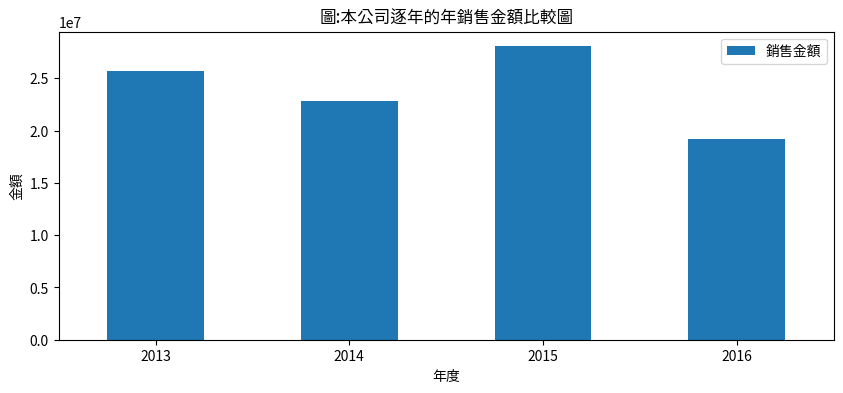

In [ ]:
import matplotlib.pyplot as plt
df12=df11.groupby(df11['銷售日期'].dt.year).agg({'銷售金額':'sum'})\
  .plot(figsize=(10,4),kind="bar",legend=True,rot=0,title='圖:本公司逐年的年銷售金額比較圖')
plt.xlabel("年度")
plt.ylabel("金額")
plt.show()

# 分析47：統計分析，本公司每月的銷售金額比較表
**若沒有先建立欄位『月』，而是直接由原始資料df，直接一行分析**

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])
df12=df12.groupby(df12['銷售日期'].dt.month_name()).agg({'銷售金額':'sum'})
df12

,銷售金額
銷售日期,
April,7797925
August,8773711
December,4783808
February,8113139
January,9739357
July,10860019
June,7888861
March,7294062
May,8652947


# 分析48：畫圖：統計分析，本公司每月的銷售金額比較圖
**若沒有先建立欄位『月』，而是直接由原始資料df，直接一行分析**

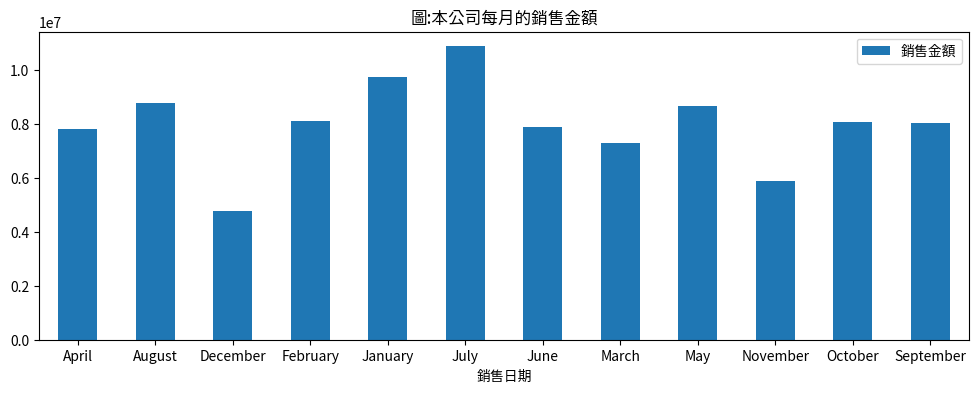

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

import matplotlib.pyplot as plt
df13=df12.groupby(df12['銷售日期'].dt.month_name()).agg({'銷售金額':'sum'})\
  .plot(figsize=(12,4),kind="bar",legend=True,rot=0,title='圖:本公司每月的銷售金額')
plt.xlabel("銷售日期")
plt.show()

# 分析49：統計分析，本公司每年各類產品的銷售金額比較表
**若沒有先建立欄位『年』，而是直接由原始資料df，直接一行分析**

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df14=df12.groupby([df12['銷售日期'].dt.year,'銷售產品']).agg({'銷售金額':'sum'}).unstack(level='銷售產品')
df14.columns=[['','','',''],['平板','手機','鍵盤','電腦']]
df14

平板       手機       鍵盤       電腦
銷售日期                                    
2013  6145110  9413364  4225562  5943769
2014  5113377  8422415  3713809  5589171
2015  8271980  8738825  4954596  6095193
2016  4420499  6074618  4752043  3992509

# 分析50：畫圖，統計分析，本公司每年各類產品的銷售金額比較表
**若沒有先建立欄位『年』，而是直接由原始資料df，直接一行分析**

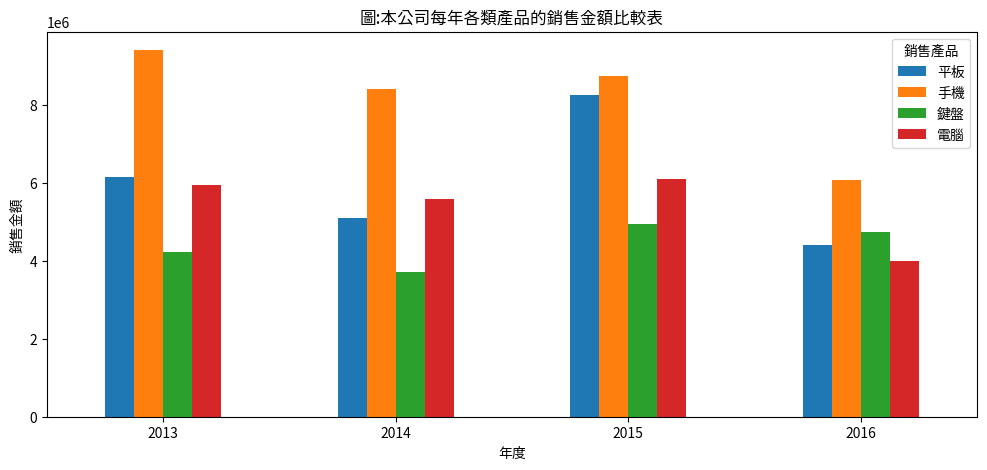

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

import matplotlib.pyplot as plt
df14=df12.pivot_table(index=df12['銷售日期'].dt.year,columns='銷售產品',values='銷售金額',aggfunc='sum')\
  .plot(figsize=(12,5),kind="bar",legend=True,rot=0,title='圖:本公司每年各類產品的銷售金額比較表')
plt.xlabel("年度")
plt.ylabel("銷售金額")
plt.show()

# 分析51：統計分析，本公司歷年各季各類產品的銷售金額比較表
**若沒有先建立欄位『季』，而是直接由原始資料df，直接一行分析**

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df15=df12.groupby(df12['銷售日期'].dt.quarter).agg({'銷售金額':'sum'})
df15.index.name = "季"
df15

,銷售金額
季,
1,25146558
2,24339733
3,27645918
4,18734631


# 分析52：統計分析，本公司每季各類產品的銷售金額比較表
**若沒有先建立欄位『季』，而是直接由原始資料df，直接一行分析**

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df15=df12.groupby([df12['銷售日期'].dt.quarter,'銷售產品']).agg({'銷售金額':'sum'}).unstack(level='銷售產品')
df15.index.name = "季"
df15

銷售金額                            
銷售產品       平板        手機       鍵盤       電腦
季                                        
1     5865385   7936887  5639428  5704858
2     7144874   7822798  4088637  5283424
3     6164903  10392942  5246786  5841287
4     4775804   6496595  2671159  4791073

# 分析53：統計分析，本公司『每年，每季』的銷售金額比較表
**若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析**

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df16=df12.pivot_table(columns=df12['銷售日期'].dt.quarter,index=df12['銷售日期'].dt.year,values='銷售金額',aggfunc='sum')
df16.index.name='年'
df16.columns.name='季'
df16

季,1,2,3,4
年,,,,
2013,6820922,6775792,6953252,5177839
2014,6578504,5725217,5977272,4557779
2015,6886600,7077588,6801437,7294969
2016,4860532,4761136,7913957,1704044


# 分析54:分析最近2年(8季)，本公司每個業務單位的業績表現
**若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析**

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df17=df12.pivot_table(index=[df12['銷售日期'].dt.year,df12['銷售日期'].dt.quarter],columns='業務單位',values='銷售金額',aggfunc='sum').tail(8)
df17.index.names=['年','季']
df17

業務單位        業務1      業務2      業務3      業務4
年    季                                    
2015 1  3885552  1274939  1209055   517054
     2  2892236  1478589   962515  1744248
     3  2659285  1321406  1515743  1305003
     4  2874296  1838577   982486  1599610
2016 1  1848732   679138   997070  1335592
     2  2121699  1194480   675461   769496
     3  4100986  1724691   815959  1272321
     4   658829   237497   251428   556290

# 分析55：畫圖：分析業務單位：『業務1』最近2年(8季)，業績表現
**若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析**

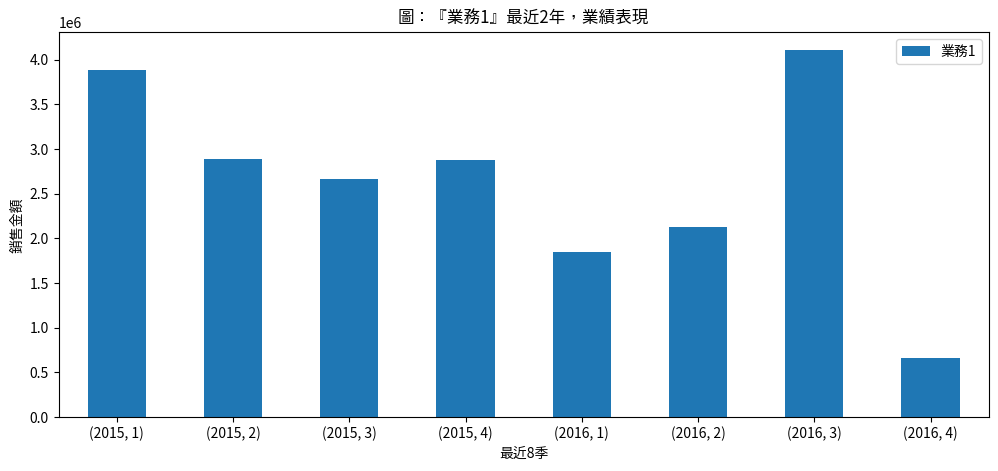

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df12 = df12.groupby([df12["銷售日期"].dt.year, df12["銷售日期"].dt.quarter, "業務單位"])["銷售金額"].sum()\
  .unstack(level="業務單位")
df12.index.names = ["年", "季"]
df12.loc[2015:2016]["業務1"]\
  .plot(kind="bar",legend=True,rot=0,figsize=(12,5),title="圖：『業務1』最近2年，業績表現")
plt.xlabel("最近8季")
plt.ylabel("銷售金額")
plt.show()

# 分析56：畫圖：分析『業務1』，『最近2年，每季』業績表現
**若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析**

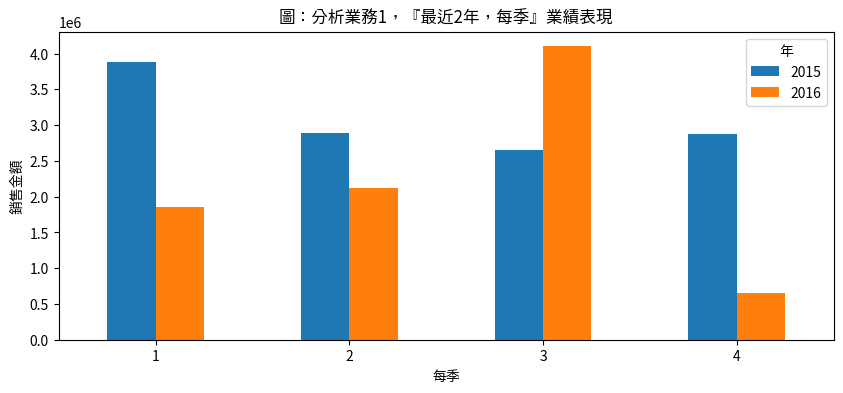

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df12 = df12.groupby([df12["銷售日期"].dt.year, df12["銷售日期"].dt.quarter, "業務單位"])["銷售金額"].sum()\
  .unstack(level="業務單位")
df12.index.names = ["年", "季"]
df12.loc[2015:2016]["業務1"].unstack(level="年")\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：分析業務1，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

# 分析57：畫圖：分析『業務2～3』，『最近2年，每季』業績表現

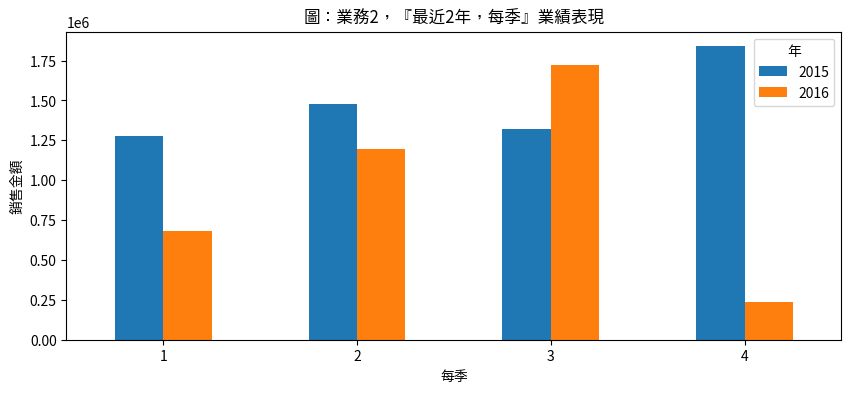

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df12 = df12.groupby([df12["銷售日期"].dt.year, df12["銷售日期"].dt.quarter, "業務單位"])["銷售金額"].sum()\
  .unstack(level="業務單位")
df12.index.names = ["年", "季"]
df12.loc[2015:2016]["業務2"].unstack(level="年")\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：業務2，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

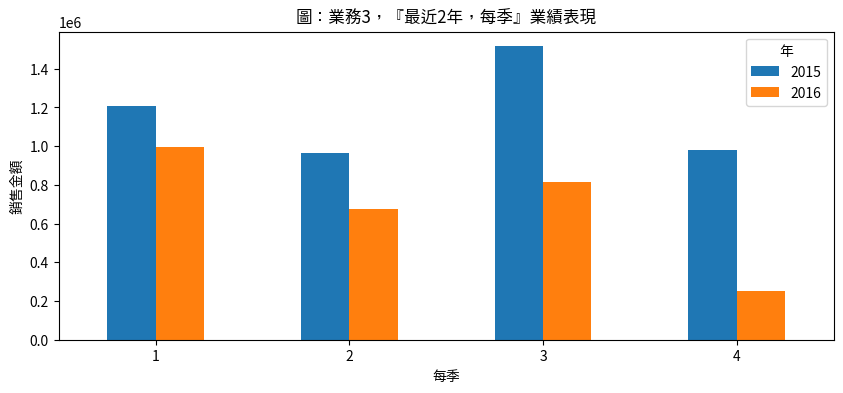

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df12 = df12.groupby([df12["銷售日期"].dt.year, df12["銷售日期"].dt.quarter, "業務單位"])["銷售金額"].sum()\
  .unstack(level="業務單位")
df12.index.names = ["年", "季"]
df12.loc[2015:2016]["業務3"].unstack(level="年")\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：業務3，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

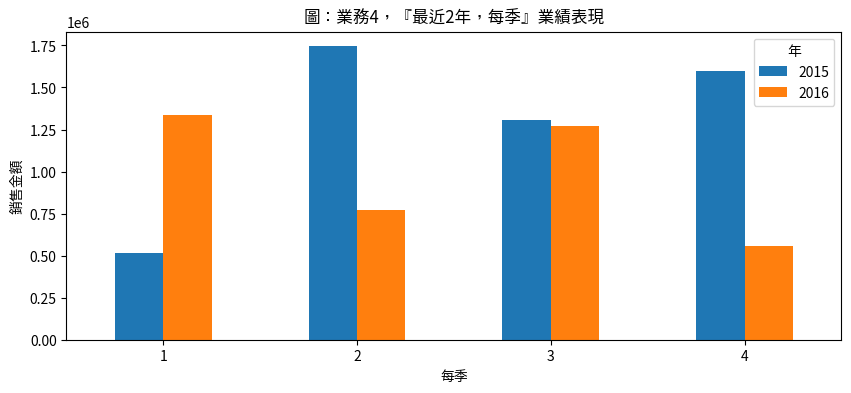

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df12 = df12.groupby([df12["銷售日期"].dt.year, df12["銷售日期"].dt.quarter, "業務單位"])["銷售金額"].sum()\
  .unstack(level="業務單位")
df12.index.names = ["年", "季"]
df12.loc[2015:2016]["業務4"].unstack(level="年")\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：業務4，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

# 分析58：畫4個圖：分析產品『手機，平板，鍵盤，電腦』，『最近2年，每季』業績表現
**若沒有先建立欄位『年，季』，而是直接由原始資料df，直接一行分析**

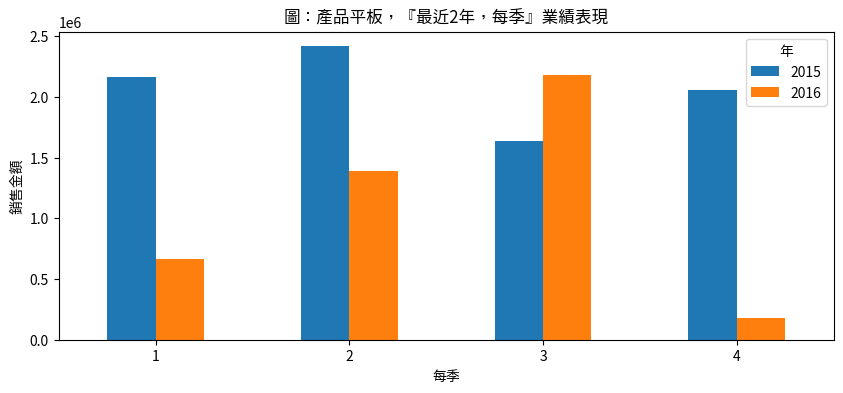

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df20=df12.pivot_table(index=[df12['銷售日期'].dt.year,df12['銷售日期'].dt.quarter],columns='銷售產品',values='銷售金額',aggfunc='sum').tail(8)
df20.index.names=['年','季']
df20.loc[2015:2016]['平板'].unstack(level='年')\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：產品平板，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

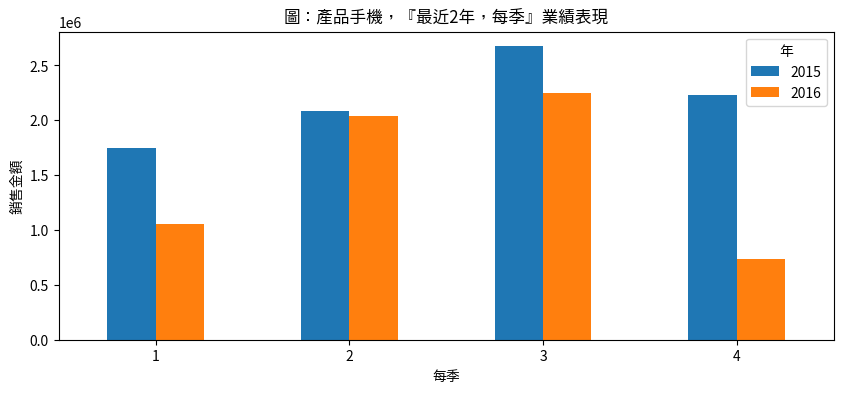

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df20=df12.pivot_table(index=[df12['銷售日期'].dt.year,df12['銷售日期'].dt.quarter],columns='銷售產品',values='銷售金額',aggfunc='sum').tail(8)
df20.index.names=['年','季']
df20.loc[2015:2016]['手機'].unstack(level='年')\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：產品手機，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

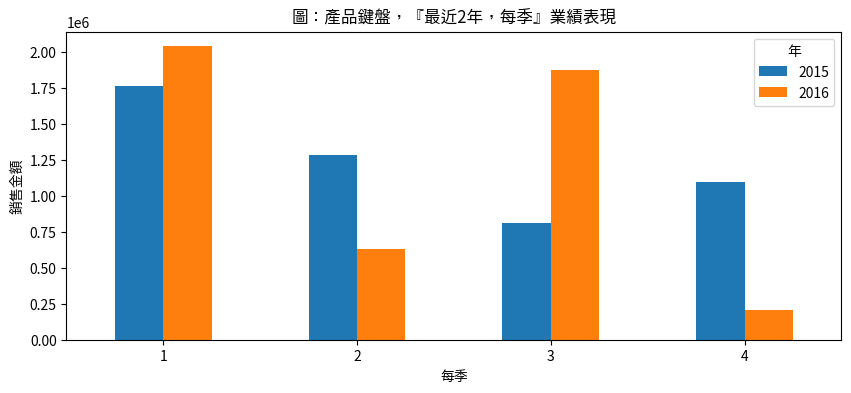

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df20=df12.pivot_table(index=[df12['銷售日期'].dt.year,df12['銷售日期'].dt.quarter],columns='銷售產品',values='銷售金額',aggfunc='sum').tail(8)
df20.index.names=['年','季']
df20.loc[2015:2016]['鍵盤'].unstack(level='年')\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：產品鍵盤，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

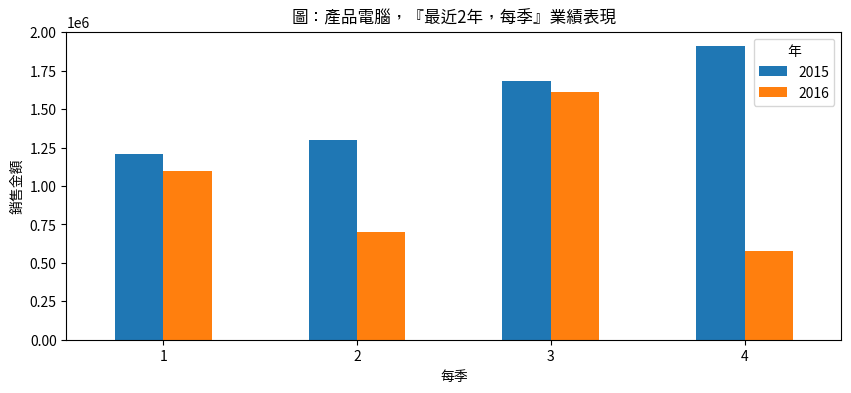

In [ ]:
df12=df.copy()
df12['銷售日期']=pd.to_datetime(df['銷售日期'])

df20=df12.pivot_table(index=[df12['銷售日期'].dt.year,df12['銷售日期'].dt.quarter],columns='銷售產品',values='銷售金額',aggfunc='sum').tail(8)
df20.index.names=['年','季']
df20.loc[2015:2016]['電腦'].unstack(level='年')\
  .plot(kind="bar",legend=True,rot=0,figsize=(10,4),title="圖：產品電腦，『最近2年，每季』業績表現")
plt.xlabel("每季")
plt.ylabel("銷售金額")
plt.show()

# 分析59：其它分析的角度

#銷售業績來自於產品優勢還是業務員能力?

In [ ]:
df21=df.copy()
df21['銷售日期']=pd.to_datetime(df21['銷售日期'])

df21=df21.groupby(['業務員',df21['銷售日期'].dt.year,'銷售產品']).agg({'銷售金額':'sum'}).unstack(level='銷售產品')
df21.index.names=['業務員','年']
df21.sort_values(['年'],ascending=False)
df21.loc['Terry']['銷售金額'].style.highlight_max(color='blue',axis=1).set_caption('最佳業務員Terry，每年銷售總金額最高的產品')

銷售產品,平板,手機,鍵盤,電腦
年,,,,
2013,185443.000000,1702443.000000,741676.000000,1481420.000000
2014,181415.000000,1057285.000000,198593.000000,932664.000000
2015,874951.000000,1368888.000000,1288944.000000,1170943.000000
2016,803277.000000,442270.000000,1109390.000000,601488.000000


# 1.2016年，最佳與最差業務員-銷售總金額最高的產品，都是鍵盤
## [推斷原因]
### .鍵盤功能大幅進化與行銷有素
### .消費者有大量鍵盤需求

# 2.過去4年，最佳與最差業務員-每年銷售總金額最高的產品,大部分都是手機
## [推斷原因]
### .手機品質穩定
### .手機品牌忠實客戶

# 3.2016年，手機景氣不佳，最佳業務員Terry，轉換鍵盤為主攻銷售產品，銷售能力依然非凡

# 60.結案報告：
#請根據上述的數據分析：找出業績下降的原因，以及如何改善。
從各種不同角度分析，包括：『不同業務單位，不同業務員，不同業務員，不同產品，逐年，每季，每月』的分析

# 1.發現:
## 銷售總金額，業務1遙遙領先(第3題)
## ->王牌業務員Terry在業務1，其他業務單位的最佳業務員和Terry差距2倍以上，其他業務1的業務員是全部單位的前四名(第16題)
# 改善:
## 業績最好的四名業務員都在業務1，可以調整平均分布於各單位，各自帶領各部門一起成長，給予經驗分享

# 2.發現:
## 各業務單位銷售總量差不多，但銷售總金額差距甚遠(第4題)
## ->業務234大部分銷售單價較低商品
# 改善:
## 先不論單價利潤高低，以銷售總額來說，業務1是採取低成本高收穫模式，建議業務234採取80/20法則，以高單價為主，低單價為輔，銷售數量相同的情況下，才能獲得最大效益